In [1]:
import tensorflow 
from tensorflow import keras 
from keras import layers

c:\Users\srinu\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\srinu\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\srinu\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\srinu\AppD

In [2]:
#load the data 
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2]*1)) 
test_data = test_data.reshape((test_data.shape[0],test_data.shape[1], test_data.shape[2]*1))
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define your model
model = Sequential([
    LSTM(64, input_shape=(train_data.shape[1], train_data.shape[2])),
    Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.save('rnn_signature_verfication_model.h5')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                23808     
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


In [9]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [10]:
history=model.fit(train_data,train_labels,batch_size=128,
                  epochs=10,validation_split=0.2,callbacks=[early_stop])

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
48000/48000 [==============================] - 9s 177us/sample - loss: 0.8680 - acc: 0.7186 - val_loss: 0.3887 - val_acc: 0.8825
Epoch 2/10
48000/48000 [==============================] - 8s 158us/sample - loss: 0.3141 - acc: 0.9055 - val_loss: 0.2331 - val_acc: 0.9289
Epoch 3/10
48000/48000 [==============================] - 8s 160us/sample - loss: 0.1975 - acc: 0.9404 - val_loss: 0.1687 - val_acc: 0.9502
Epoch 4/10
48000/48000 [==============================] - 8s 157us/sample - loss: 0.1463 - acc: 0.9556 - val_loss: 0.1292 - val_acc: 0.9632
Epoch 5/10
48000/48000 [==============================] - 18s 365us/sample - loss: 0.1177 - acc: 0.9644 - val_loss: 0.1194 - val_acc: 0.9633
Epoch 6/10
48000/48000 [==============================] - 10s 211us/sample - loss: 0.0996 - acc: 0.9697 - val_loss: 0.1038 - val_acc: 0.9681
Epoch 7/10
480

In [13]:
import matplotlib.pyplot as plt

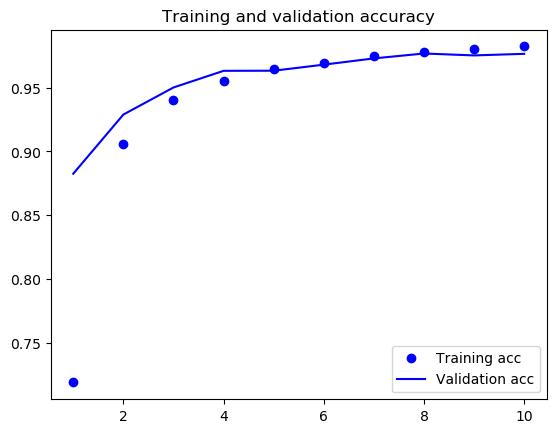

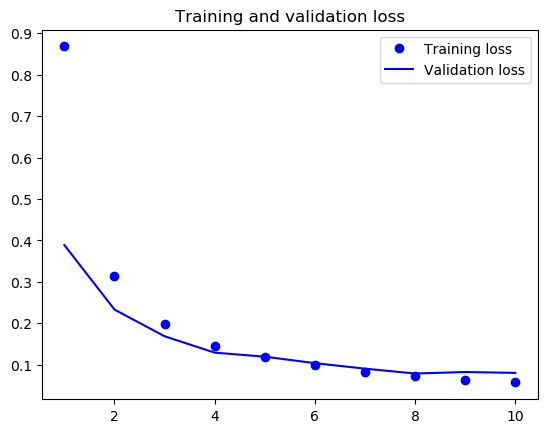

In [14]:
#plot accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
final_loss,final_accuracy=model.evaluate(test_data,test_labels)
print('Final loss: {:.2f}%'.format(final_loss*100))
print('Final Accuracy: {:.2f}%'.format(final_accuracy*100))

10000/10000 [==============================] - 1s 130us/sample - loss: 0.0792 - acc: 0.9761
Final loss: 7.92%
Final Accuracy: 97.61%
